In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
dataset = pd.read_csv('RealEstate.csv')
dataset.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [34]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [35]:
dataset.shape

(2226382, 12)

In [36]:
dataset.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [37]:
dataset.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [38]:
dataset.head(2)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN


In [39]:
dataset = dataset.drop(['brokered_by', 'prev_sold_date'], axis = 1)
dataset.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state',
       'zip_code', 'house_size'],
      dtype='object')

In [40]:
dataset.dropna(inplace = True)
dataset.isna().sum().sum()

0

In [41]:
dataset.duplicated().sum()

436

In [42]:
dataset.drop_duplicates(inplace = True )
dataset.duplicated().sum()

0

In [43]:
dataset.head(2)

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0


In [44]:
sns.set(style='whitegrid')

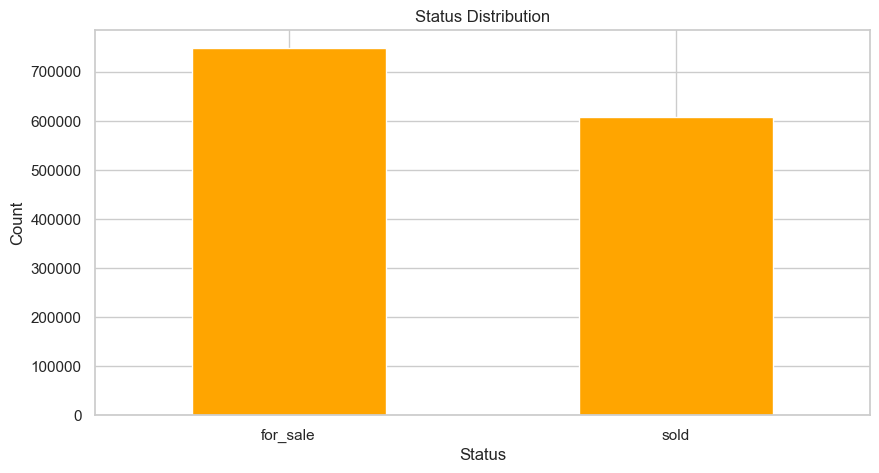

In [45]:
dataset['status'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'orange')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [46]:
dataset['city'].unique()

array(['Adjuntas', 'Juana Diaz', 'Ponce', ..., 'Washtucna', 'Kahlotus',
       'Touchet'], dtype=object)

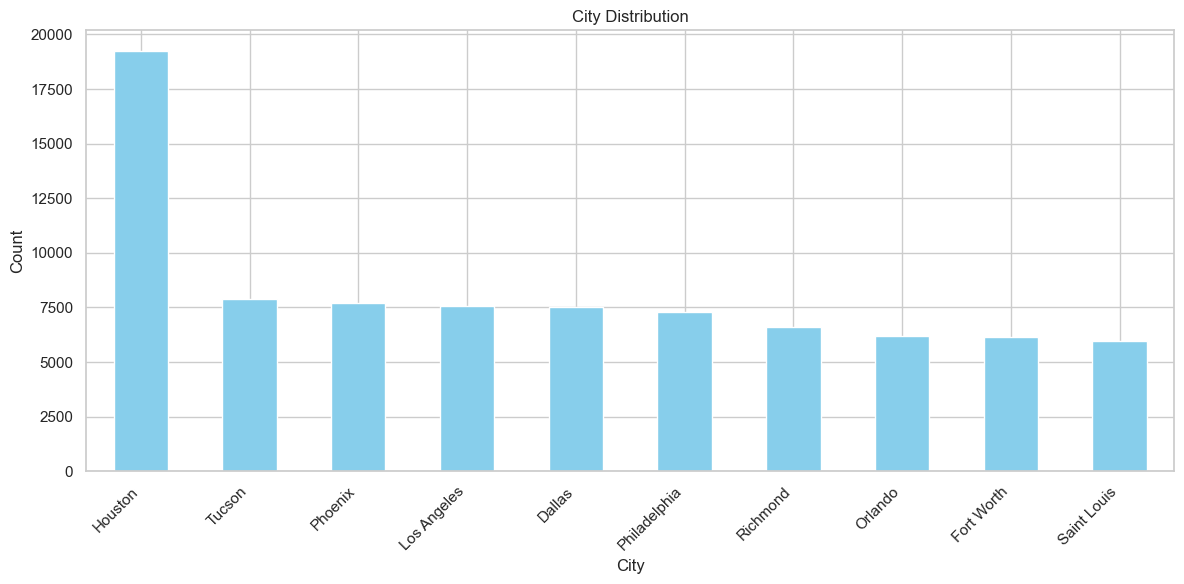

In [47]:
city_counts = dataset['city'].value_counts().head(10)
city_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

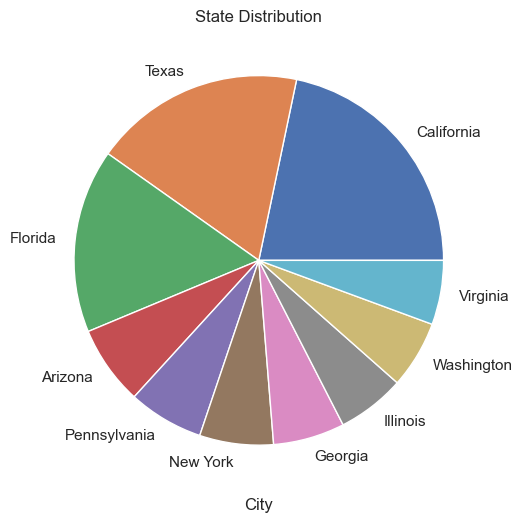

In [48]:
dataset['state'].value_counts().head(10).plot(kind='pie', figsize=(12,6))
plt.title('State Distribution')
plt.xlabel('City')
plt.ylabel('')
plt.show()

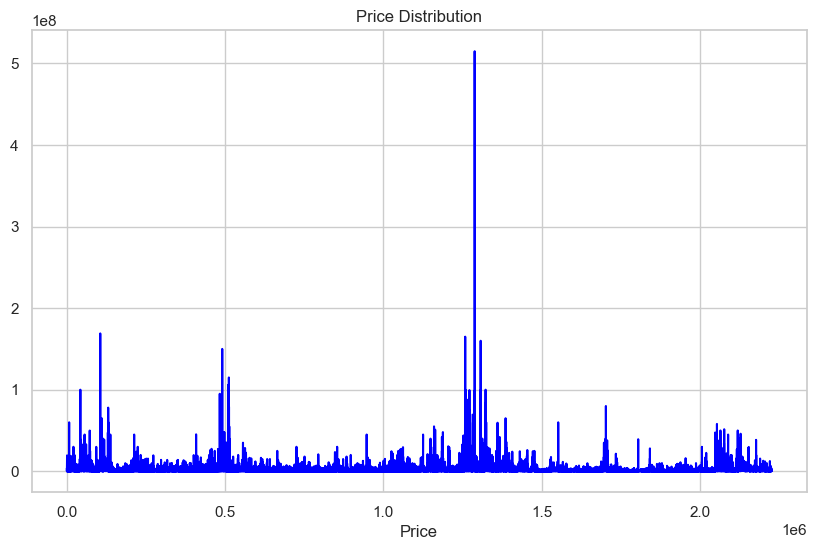

In [49]:
dataset['price'].plot(kind='line', figsize=(10,6), color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

In [50]:
dataset.groupby(['city', 'state'])['price'].mean().sort_values(ascending=False)

city          state   
Bolingbroke   Georgia     4.525000e+07
Campo         Colorado    4.500000e+07
Manalapan     Florida     2.885283e+07
Bal Harbour   Florida     2.658571e+07
Gulf Stream   Florida     2.146125e+07
                              ...     
Curlew        Iowa        7.450000e+03
Pilot Mound   Iowa        6.500000e+03
Argyle        Iowa        5.500000e+03
Walnut Creek  Ohio        1.000000e+00
Willow Hill   Illinois    1.000000e+00
Name: price, Length: 26257, dtype: float64

In [51]:
dataset.head(2)

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0


In [52]:
x = dataset[['bed', 'bath', 'house_size']]
y = dataset['price']
x
#y

,bed,bath,house_size
0,3.0,2.0,920.0
1,4.0,2.0,1527.0
2,2.0,1.0,748.0
3,4.0,2.0,1800.0
5,4.0,3.0,2520.0
...,...,...,...
2226377,4.0,2.0,3600.0
2226378,3.0,2.0,1616.0
2226379,6.0,3.0,3200.0
2226380,2.0,1.0,933.0


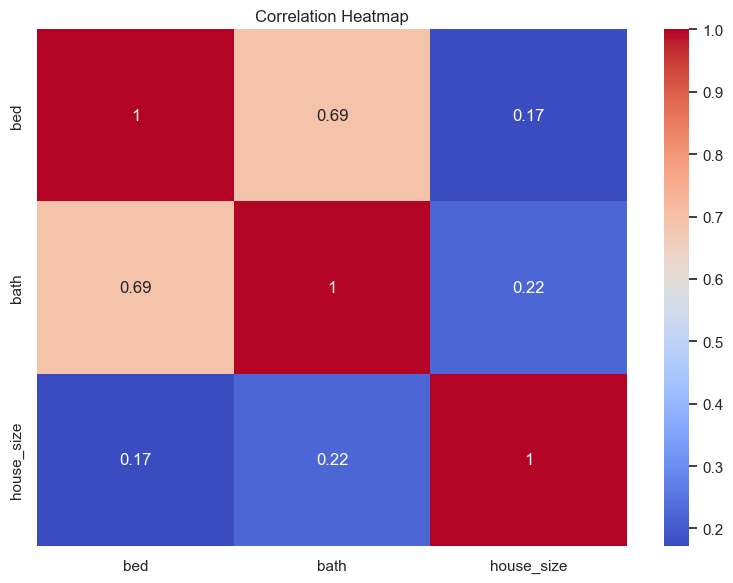

In [53]:
corr = x.corr()
corr

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [54]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 316037.45
Mean Squared Error: 1004999877483.42
R2 Score: 0.18


In [57]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[371468.51753919 254900.        ]
 [905183.56794102 550000.        ]
 [470308.99054022 450000.        ]
 ...
 [766086.88543573  84000.        ]
 [406244.9303816  135000.        ]
 [483653.32366024 215000.        ]]


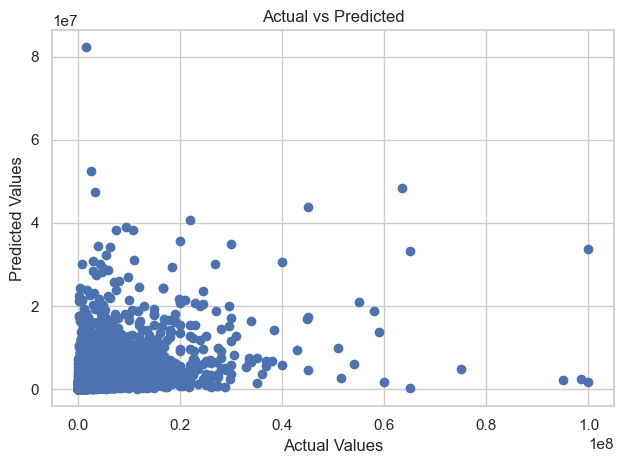

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
x

,bed,bath,house_size
0,3.0,2.0,920.0
1,4.0,2.0,1527.0
2,2.0,1.0,748.0
3,4.0,2.0,1800.0
5,4.0,3.0,2520.0
...,...,...,...
2226377,4.0,2.0,3600.0
2226378,3.0,2.0,1616.0
2226379,6.0,3.0,3200.0
2226380,2.0,1.0,933.0


In [60]:
y

0          105000.0
1           80000.0
2           67000.0
3          145000.0
5          179000.0
             ...   
2226377    359900.0
2226378    350000.0
2226379    440000.0
2226380    179900.0
2226381    580000.0
Name: price, Length: 1355919, dtype: float64

In [64]:
user_input = [[2, 1, 748]]
results = model.predict(user_input)[0]
print(f"Prediction: {results:.2f}" )

Prediction: 187997.98
